In [33]:
import numpy as np
import random
import seaborn as sns
import warnings
import scipy

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from geneticalgorithm2 import geneticalgorithm2 as ga
from geneticalgorithm2 import AlgorithmParams
from OptimizationTestFunctions import Ackley, Rastrigin, plot_3d
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from umap import UMAP


def vb_from_ga(vb, dim):
    return np.array([vb]*dim)

# Rastrigin

In [34]:
rastrigin_vb = [-5.12,5.12]

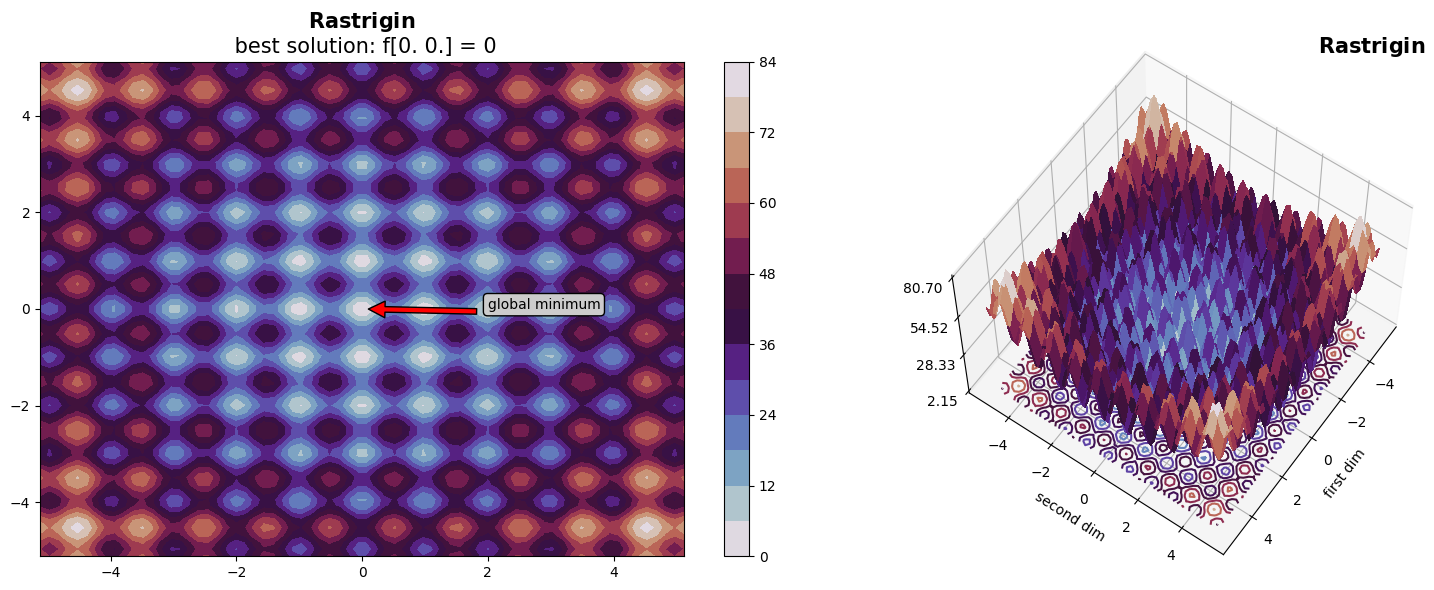

In [40]:
func = Rastrigin(dim=2)
plot_3d(func, 
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Rastrigin GA

### Dimension 2


Average time of function evaluating (secs): 0.00047615766525268557 (total = 0.047615766525268555)

Best score before optimization: 3.6809328901193084
                                                                                                                                                                                                        
 The best found solution:
 [0.0002346 0.0050477]

 Objective function:
 0.005065377083596445

 Used generations: 100
 Used time: 0.341 seconds


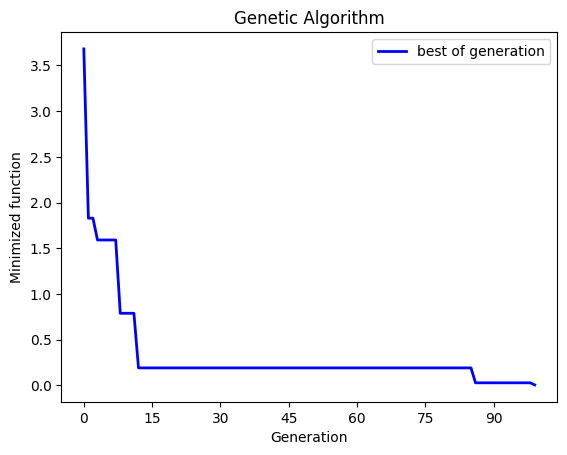

[0.0002346 0.0050477]
0.005065377083596445


In [41]:
func = Rastrigin(dim=2)
model_rastrigin = ga(func, 
                     dimension = 2, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(rastrigin_vb, 2),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.0005320286750793457 (total = 0.05320286750793457)

Best score before optimization: 0.110801404425521
                                                                                                                                                                                                        
 The best found solution:
 [-3.60261139e-06]

 Objective function:
 2.574891411200042e-09

 Used generations: 100
 Used time: 0.353 seconds


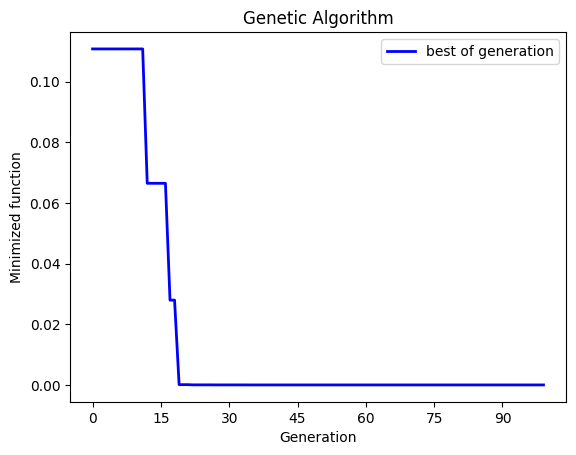

[-3.60261139e-06]
2.574891411200042e-09


In [42]:
func = Rastrigin(dim=1)
model_rastrigin = ga(func, 
                     dimension = 1, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(rastrigin_vb, 1),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

## Rastrigin CG

In [43]:
func = Rastrigin(dim=1)
scipy.optimize.minimize(func, rastrigin_vb, method='cg')

     fun: 21.838487584923083
     jac: array([2.38418579e-07, 2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 4
    njev: 18
  status: 0
 success: True
       x: array([-3.97978387,  3.97978385])

# Ackley

In [45]:
ackley_vb = [-32.768,32.768]

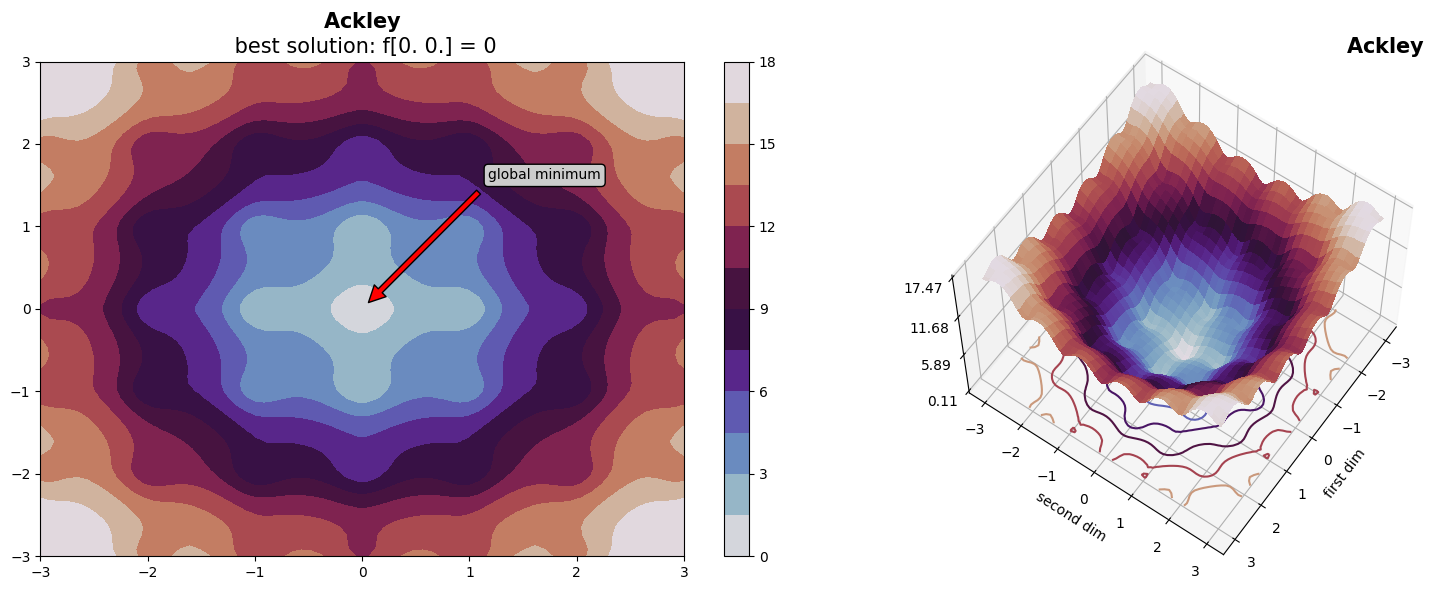

In [47]:
func = Ackley(dim=2)
plot_3d(func, 
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Ackley GA

### Dimension 2


Average time of function evaluating (secs): 0.0004807877540588379 (total = 0.04807877540588379)

Best score before optimization: 20.092197974423925
                                                                                                                                                                                                        
 The best found solution:
 [0.07760419 0.00015154]

 Objective function:
 0.1659107853050119

 Used generations: 100
 Used time: 0.364 seconds


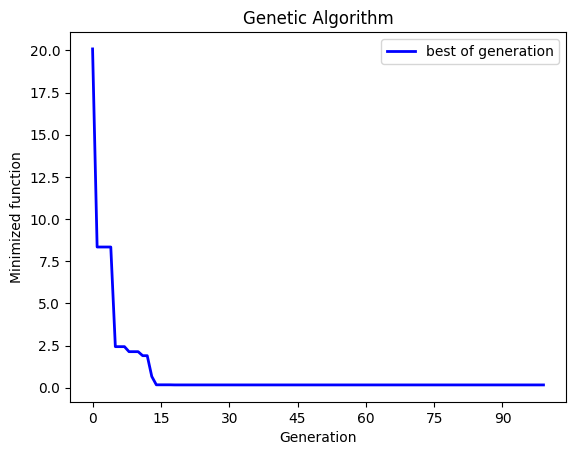

[0.07760419 0.00015154]
0.1659107853050119


In [48]:
func = Ackley(dim=2)
model_ackley = ga(func, 
                  dimension = 2, 
                  variable_type='real', 
                  variable_boundaries = vb_from_ga(ackley_vb, dim=2),
                  function_timeout = 10,
                  algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_ackley.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.0005020332336425781 (total = 0.05020332336425781)

Best score before optimization: 2.949861494142991
                                                                                                                                                                                                        
 The best found solution:
 [0.00027535]

 Objective function:
 4.37142489895237e-06

 Used generations: 100
 Used time: 0.358 seconds


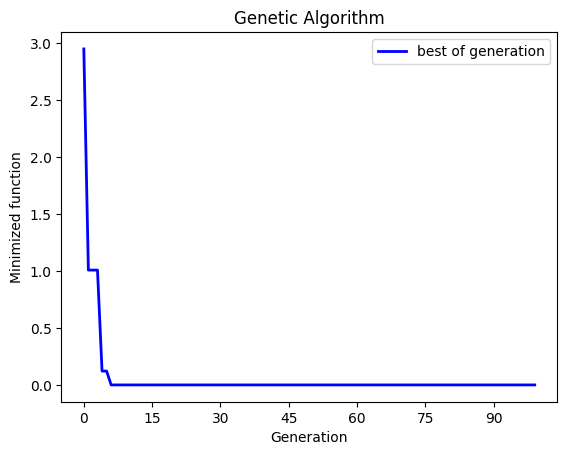

[0.00027535]
4.37142489895237e-06


In [49]:
func = Ackley(dim=1)
model_ackley = ga(func, 
                  dimension = 1, 
                  variable_type='real', 
                  variable_boundaries = vb_from_ga(ackley_vb, dim=1),
                  function_timeout = 10,
                  algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_ackley.run()

print(result.variable) # best solution
print(result.score) # best score

## Ackley CG

In [50]:
func = Ackley(dim=1)
scipy.optimize.minimize(func, ackley_vb, method='cg')

     fun: 20.000000000000004
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([-33.00000001,  32.99999999])

# Task 2

In [8]:
def read_data(filename: str, delimeter=';'):
    with open(filename, mode="r", newline='') as f:
        features = list()
        targets = list()
        for row in f:
            line = list()
            for s in row.split(delimeter):
                s = s.strip()
                if s:
                    line.append(s)
            
            t = int(line[-1])
            if t < 3:
                features.append(list(map(float ,line[1:-1])))
                targets.append(t-1)
            if t == 6:
                features.append(list(map(float ,line[1:-1])))
                targets.append(2)
            if t == 7:
                features.append(list(map(float ,line[1:-1])))
                targets.append(3)
    return features, targets

In [9]:
def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        return xx, yy

def plot_contours(model, xx, yy, ax, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_surface(model, xx, yy, ax, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.plot_surface(xx, yy, Z, **params)
    return out

In [10]:
def plot_results(features, targets, model, figsize=(10, 5), in3d=False):
    xx, yy = make_meshgrid(features[:, 0], features[:, 1])

    fig = plt.figure(figsize=(15, 15))
    
    if in3d:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    else:
        ax = fig.gca()
    colormap = 'coolwarm'
    labels = np.unique(targets).tolist()
    palette = np.array(sns.color_palette(colormap, n_colors=len(labels)))
    cmap = sns.color_palette(colormap, as_cmap=True)

    patchs = []
    for i, color in enumerate(palette):
        patchs.append(mpatches.Patch(color=color, label=i))
    if in3d:
        plot_surface(model, xx, yy, ax, cmap=cmap, alpha=0.8)
    else:
        plot_contours(model, xx, yy, ax, cmap=cmap, alpha=0.8)
    plt.scatter(features[:, 0], features[:, 1], c=targets, cmap=cmap, s=40, edgecolors='k')
    # plt.xticks(())
    # plt.yticks(())
    plt.axis('off')
    # plt.legend(handles=patchs, loc='upper right')
    plt.show()

In [11]:
features, targets = read_data('glass.data', delimeter=',')
features = np.array(features)
targets = np.array(targets)

In [12]:
print(classification_report(targets, targets))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        29

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [13]:
features = UMAP().fit_transform(features)
features = StandardScaler().fit_transform(features)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, shuffle=True)
x_train.shape, x_test.shape

((128, 2), (56, 2))

# SVM (SVC)

In [21]:
svc_parameters = {
    'kernel':['poly', 'rbf', 'sigmoid'],
    'C': np.linspace(1, 10, 11),
    'degree': np.linspace(3, 6, 4)
}

clf_svc = GridSearchCV(SVC(), svc_parameters)

In [22]:
clf_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
                         'degree': array([3., 4., 5., 6.]),
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [ ]:
def test(kernel, C, degree)